# Sales Conversion Optimization

## 1. Import the libraries and load the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('KAG_conversion_data.csv')
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [4]:
data.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


## 2. Dummy encode any categorical or object values in the data and save the resulting data frame to variable X.


In [6]:
for column in data.columns:
    col = data[column]
    
    print(f'"{column}" unique values =', col.nunique())

"ad_id" unique values = 1143
"xyz_campaign_id" unique values = 3
"fb_campaign_id" unique values = 691
"age" unique values = 4
"gender" unique values = 2
"interest" unique values = 40
"Impressions" unique values = 1130
"Clicks" unique values = 183
"Spent" unique values = 869
"Total_Conversion" unique values = 32
"Approved_Conversion" unique values = 16


In [7]:
X = pd.get_dummies(data, columns=['age', 'gender'])
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,1,0,0,0,0,1


## 3. Using a heat map to show the correlation in the data.

<AxesSubplot:>

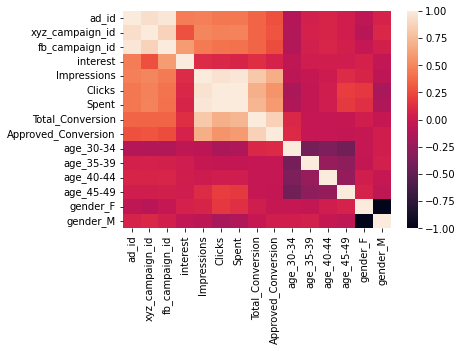

In [8]:
sns.heatmap(X.corr())

## 3 a. Drop the first 4 columns in the data frame X

In [9]:
X.drop(X.columns[[0,1,2,3]], axis=1, inplace=True)

<AxesSubplot:>

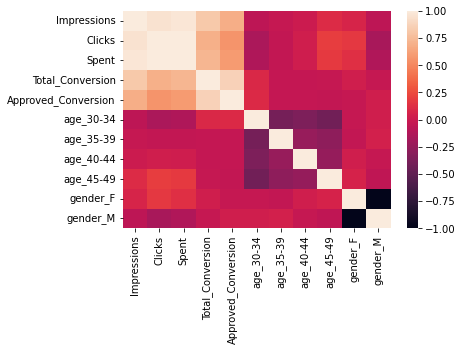

In [10]:
sns.heatmap(X.corr())

## 4. Using the elbow method: 
   ### a. Determine the best number of clusters for the data in the range of 2 to 20.

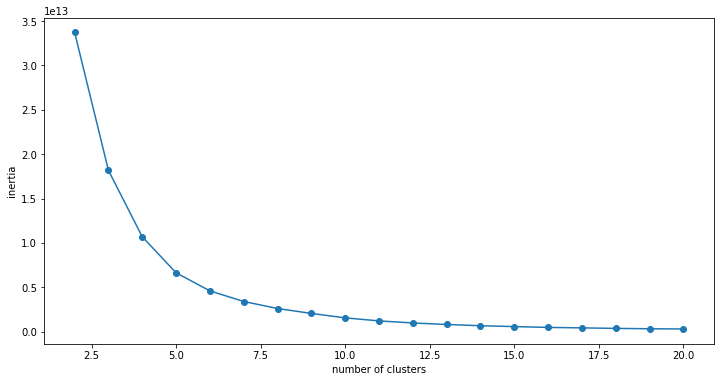

In [11]:
inertias = []
KK = range(2, 21)
for k in KK:
  model = KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  model.fit(X)
  inertias.append(model.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(KK, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()


## 5. Based on the result above in 4b use the value at your elbow point to cluster the values in the data frame X.

In [12]:
model = KMeans(n_clusters = 3).fit(X)
model

KMeans(n_clusters=3)

## 6. Use the model to predict the labels from the data and save them to variable y_means.
## 7. Add the values in y_means to the original data frame (not X) as column ‘Advert_Type’

In [13]:
y_means = model.predict(X)

data['Advert_Type'] = y_means
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1


## 8. Using any form of distribution plot of your choice and the original data frame, plot 2 graphs that can be used to answer the following:
### a. Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets?

Assuming: 
1. Approved conversion can be the total number of people who bought the product after seeing the ad.
2. Total conversion can be Total number of people who enquired about the product after seeing the ad.

Therefore Advert type 2 had the most sales in all the age brackets as shown by the two bar graph below


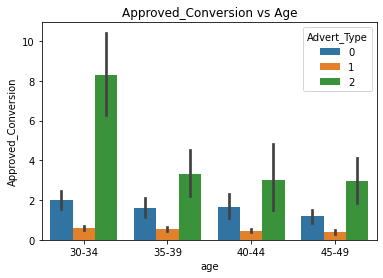

In [14]:
sns.barplot(data=data, x="age", y="Approved_Conversion", hue="Advert_Type")
plt.title('Approved_Conversion vs Age')
plt.show()

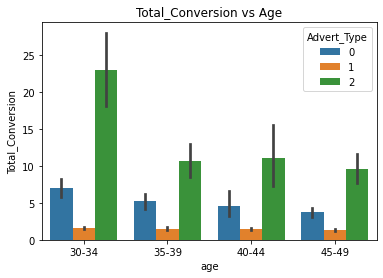

In [15]:
sns.barplot(data=data, x="age", y="Total_Conversion", hue="Advert_Type")
plt.title('Total_Conversion vs Age')
plt.show()

### b. Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?

As shown in the graph below, we can say xyz company ad spending with respect to the three adverts type is gender biased towards the female gender.

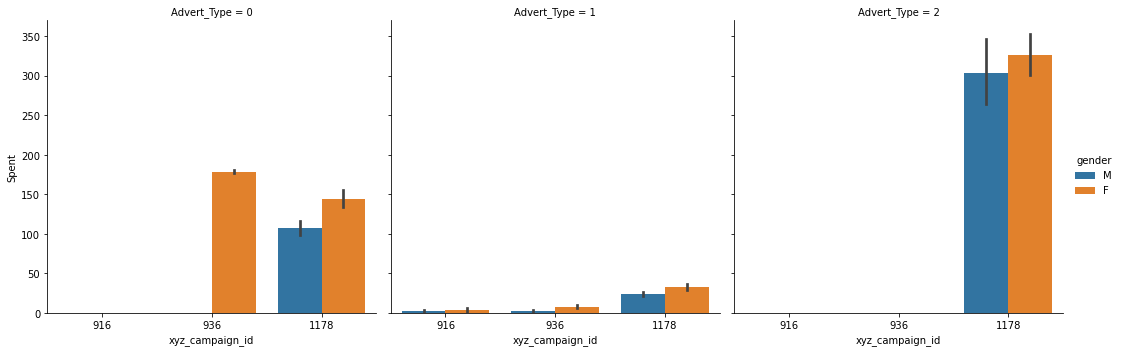

In [19]:
sns.catplot(data=data, x="xyz_campaign_id", y="Spent", hue="gender", col="Advert_Type", kind="bar")
plt.show()

##  Perform the same analysis using hierarchical clustering and compare the results in terms of the number of useable clusters.

From the figure below we can see that the number of useable clusters is 3

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

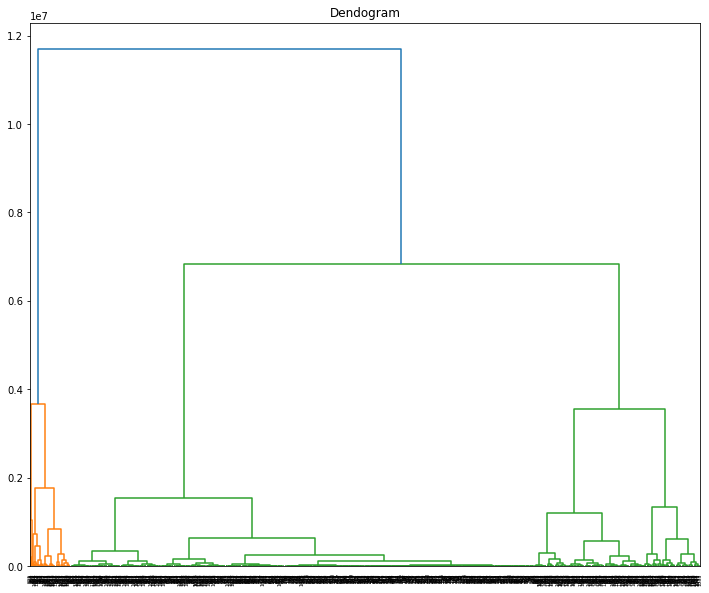

In [18]:
plt.figure(figsize=(12,10))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.show()